<a href="https://colab.research.google.com/github/CheesyPitsa/Lab2.2/blob/main/Lab2_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

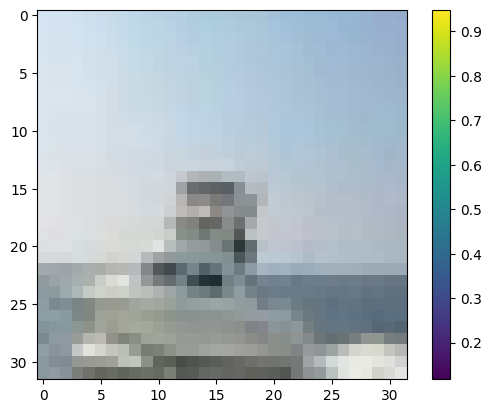

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras import utils

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

class_names = ('airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck')

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()

plt.figure()
plt.imshow(x_train[100])
plt.colorbar()
plt.grid(False)

In [157]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_78 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_79 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_80 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-tra

In [158]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(10))

model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_78 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_79 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_80 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_26 (Flatten)        (None, 1024)            

In [159]:
model.compile(optimizer = tf.keras.optimizers.Nadam(use_ema=True),
              #optimizer='sgd', 
              #loss="mean_squared_error",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [160]:
model.fit(x_train, y_train, epochs = 15)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/15
1563/1563 [==============================] - 11s 6ms/step - loss: 1.4090 - accuracy: 0.4916
Epoch 2/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0518 - accuracy: 0.6285
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8824 - accuracy: 0.6917
Epoch 4/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7689 - accuracy: 0.7326
Epoch 5/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6780 - accuracy: 0.7614
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5981 - accuracy: 0.7917
Epoch 7/15
1563/1563 [==============================] - 9s 5ms/step - loss: 0.5268 - accuracy: 0.8150
Epoch 8/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4591 - accuracy: 0.8383
Epoch 9/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3947 - accuracy: 0.8605
Epoch 10/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.33

In [161]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


2

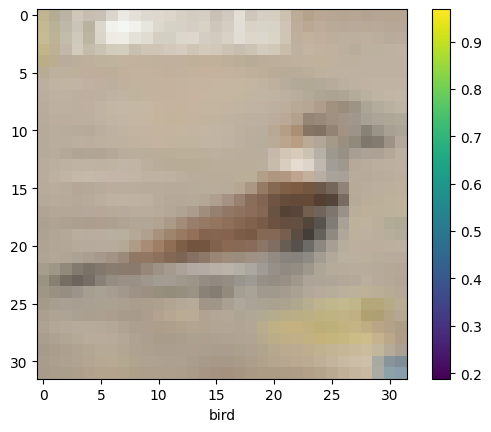

In [162]:
im = 70

predictions[im]

np.argmax(predictions[im])
y_test[im]

plt.figure()
plt.imshow(x_test[im])
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[y_test[im]])

y_test[im]